In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [2]:
df=pd.read_csv('m5-forecasting-accuracy/sales_train_evaluation.csv')
cal=pd.read_csv('m5-forecasting-accuracy/calendar.csv')
prices=pd.read_csv('m5-forecasting-accuracy/sell_prices.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1947 entries, id to d_1941
dtypes: int64(1941), object(6)
memory usage: 452.9+ MB


In [4]:
df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0


In [5]:
#data['id'].nunique()
print(f"Number of items: {df['id'].nunique()}")
print(f"Number of departments: {df['dept_id'].nunique()}")
print(f"Number of categories: {df['cat_id'].nunique()} -----> {df['cat_id'].unique()}")
print(f"Number of stores: {df['store_id'].nunique()}")
print(f"Number of states: {df['state_id'].nunique()} -----> {df['state_id'].unique()}")




Number of items: 30490
Number of departments: 7
Number of categories: 3 -----> ['HOBBIES' 'HOUSEHOLD' 'FOODS']
Number of stores: 10
Number of states: 3 -----> ['CA' 'TX' 'WI']


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

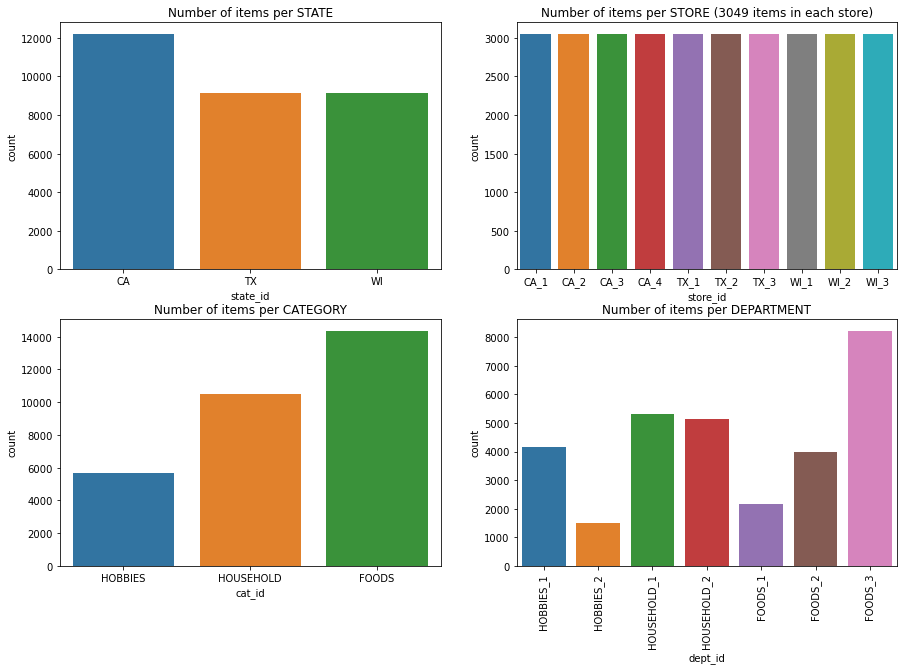

In [6]:
fig,ax=plt.subplots(2,2,figsize=(15,10))

sns.countplot(df['state_id'],ax=ax[0,0])
ax[0,0].set_title('Number of items per STATE')

sns.countplot(df['store_id'],ax=ax[0,1])
ax[0,1].set_title('Number of items per STORE (3049 items in each store)')

sns.countplot(df['cat_id'],ax=ax[1,0])
ax[1,0].set_title('Number of items per CATEGORY')

sns.countplot(df['dept_id'],ax=ax[1,1])
ax[1,1].set_title('Number of items per DEPARTMENT')
plt.xticks(rotation='vertical')

In [7]:
total_sales_bystate=df.groupby("state_id").sum()
total_sales_bystate=total_sales_bystate.T
total_sales_bystate=total_sales_bystate.reset_index().rename(columns={"index":"d"})
#print(total_sales_bystate)

total_sales_bystore=df.groupby("store_id").sum()
total_sales_bystore=total_sales_bystore.T
total_sales_bystore=total_sales_bystore.reset_index().rename(columns={"index":"d"})
#print(total_sales_bystore)

total_sales_bycategory=df.groupby("cat_id").sum()
total_sales_bycategory=total_sales_bycategory.T
total_sales_bycategory=total_sales_bycategory.reset_index().rename(columns={"index":"d"})
#print(total_sales_bycategory)

total_sales_bydepartment=df.groupby("dept_id").sum()
total_sales_bydepartment=total_sales_bydepartment.T
total_sales_bydepartment=total_sales_bydepartment.reset_index().rename(columns={"index":"d"})
#print(total_sales_bydepartment)

In [8]:
cal.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [9]:
cal=cal.merge(total_sales_bystate, left_on='d', right_on='d')

In [10]:
cal=cal.merge(total_sales_bystore, left_on='d', right_on='d')

In [11]:
cal=cal.merge(total_sales_bycategory, left_on='d', right_on='d')

In [12]:
cal=cal.merge(total_sales_bydepartment, left_on='d', right_on='d')

In [13]:
cal.columns

Index(['date', 'wm_yr_wk', 'weekday', 'wday', 'month', 'year', 'd',
       'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2',
       'snap_CA', 'snap_TX', 'snap_WI', 'CA', 'TX', 'WI', 'CA_1', 'CA_2',
       'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1', 'WI_2', 'WI_3', 'FOODS',
       'HOBBIES', 'HOUSEHOLD', 'FOODS_1', 'FOODS_2', 'FOODS_3', 'HOBBIES_1',
       'HOBBIES_2', 'HOUSEHOLD_1', 'HOUSEHOLD_2'],
      dtype='object')

In [14]:
cal['total_sales']=cal['CA']+cal['TX']+cal['WI']
cal.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,...,HOBBIES,HOUSEHOLD,FOODS_1,FOODS_2,FOODS_3,HOBBIES_1,HOBBIES_2,HOUSEHOLD_1,HOUSEHOLD_2,total_sales
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,...,3764,5689,2343,4094,16741,3610,154,4105,1584,32631
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,...,3357,5634,2216,4209,16333,3172,185,3858,1776,31749
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,...,2682,3927,1657,3174,12343,2497,185,2827,1100,23783
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,...,2669,3865,1508,3606,13764,2531,138,2732,1133,25412
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,...,1814,2729,1209,2869,10525,1714,100,1802,927,19146


Text(0.5, 1.0, 'Events counts')

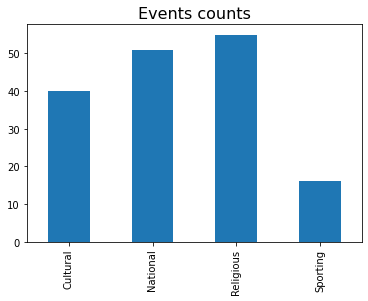

In [15]:
event1=cal.groupby(['event_type_1']).count()['date']
event2=cal.groupby(['event_type_2']).count()['date']
events_count=event1.add(event2,fill_value=0)
events_count.plot(kind='bar')
plt.title('Events counts',fontsize=16)

In [16]:
cal['date']=pd.to_datetime(cal['date'])

Text(0.5, 1.0, 'ANNUALY - Sales per CATEGORY')

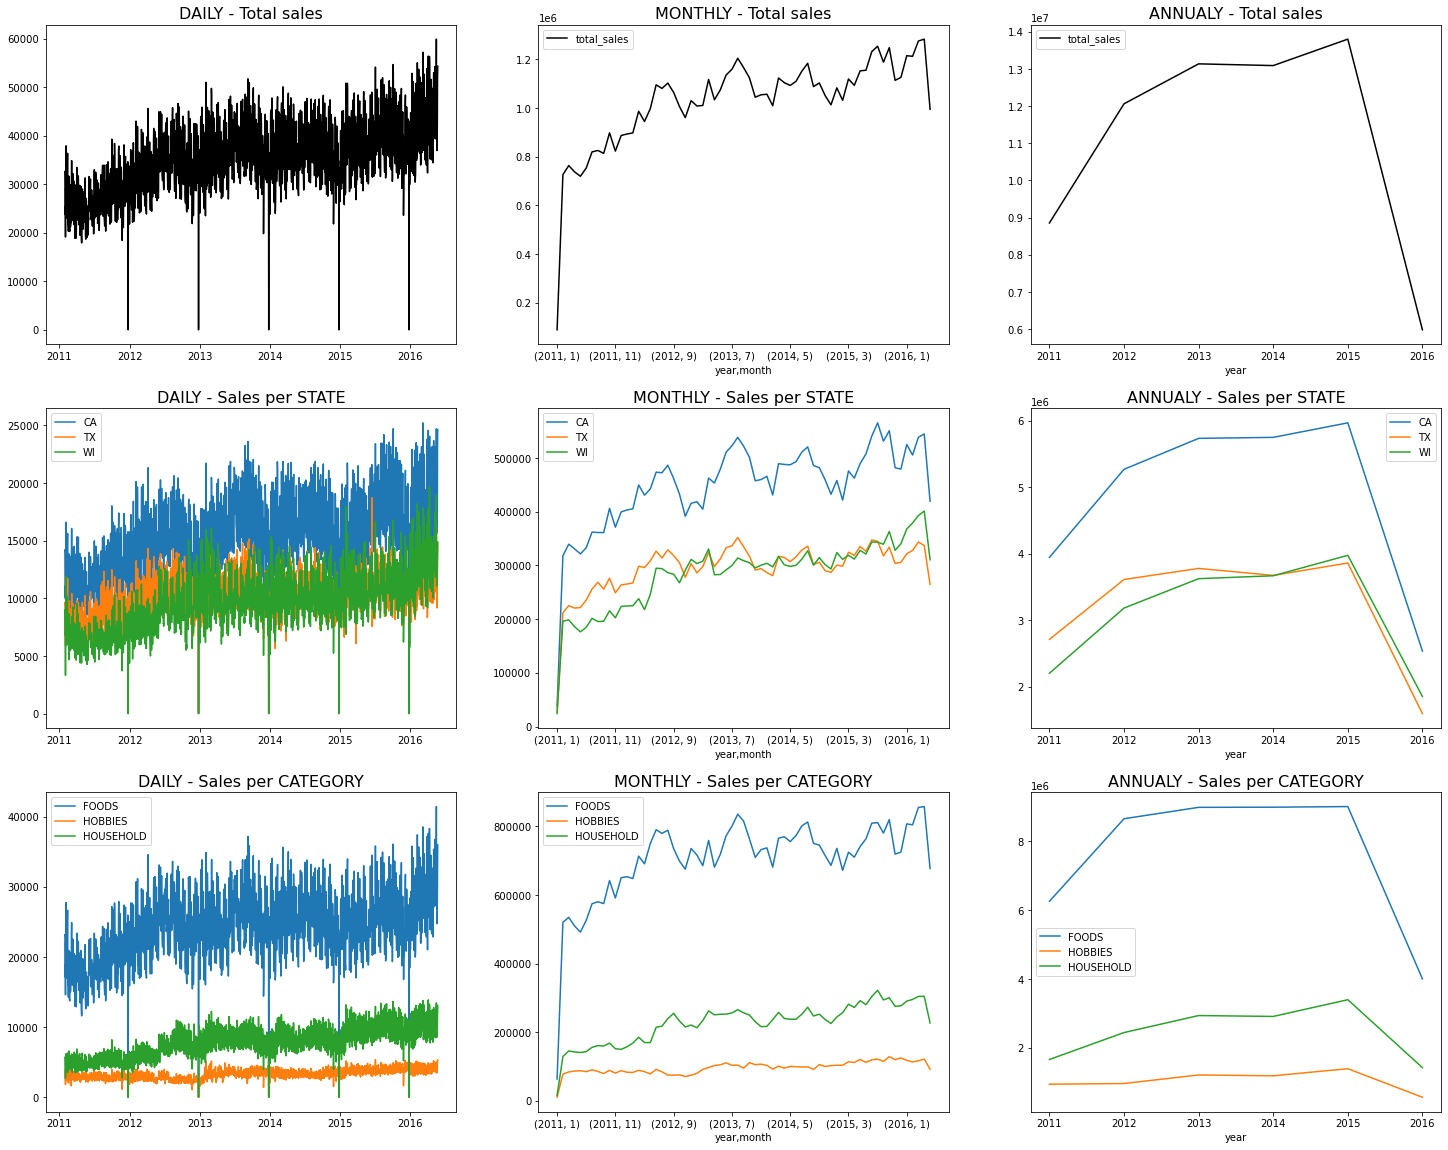

In [17]:
fig,ax=plt.subplots(3,3,figsize=(25,20))

#Total Sales
ax[0,0].plot(cal['date'],cal['total_sales'],color='black')
ax[0,0].set_title('DAILY - Total sales',fontsize=16)

cal.groupby(['year','month']).sum()[['total_sales']].plot(ax=ax[0,1],color='black')
ax[0,1].set_title('MONTHLY - Total sales',fontsize=16)

cal.groupby(['year']).sum()[['total_sales']].plot(ax=ax[0,2],color='black')
ax[0,2].set_title('ANNUALY - Total sales',fontsize=16)


#by STATE

ax[1,0].plot(cal['date'],cal[['CA']],label='CA')
ax[1,0].plot(cal['date'],cal['TX'],label='TX')
ax[1,0].plot(cal['date'],cal['WI'],label='WI')
ax[1,0].set_title('DAILY - Sales per STATE',fontsize=16)
ax[1,0].legend()

cal.groupby(['year','month']).sum()[['CA','TX','WI']].plot(ax=ax[1,1])
ax[1,1].set_title('MONTHLY - Sales per STATE',fontsize=16)

cal.groupby(['year']).sum()[['CA','TX','WI']].plot(ax=ax[1,2])
ax[1,2].set_title('ANNUALY - Sales per STATE',fontsize=16)


#by STORE

ax[2,0].plot(cal['date'],cal['FOODS'],label='FOODS')
ax[2,0].plot(cal['date'],cal['HOBBIES'],label='HOBBIES')
ax[2,0].plot(cal['date'],cal['HOUSEHOLD'],label='HOUSEHOLD')
ax[2,0].set_title('DAILY - Sales per CATEGORY',fontsize=16)
ax[2,0].legend()

cal.groupby(['year','month']).sum()[['FOODS','HOBBIES','HOUSEHOLD']].plot(ax=ax[2,1])
ax[2,1].set_title('MONTHLY - Sales per CATEGORY',fontsize=16)

cal.groupby(['year']).sum()[['FOODS','HOBBIES','HOUSEHOLD']].plot(ax=ax[2,2])
ax[2,2].set_title('ANNUALY - Sales per CATEGORY',fontsize=16)



In [18]:
store_list=['CA_1', 'CA_2','CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1', 'WI_2', 'WI_3']
dept_list=['FOODS_1', 'FOODS_2', 'FOODS_3', 'HOBBIES_1','HOBBIES_2', 'HOUSEHOLD_1', 'HOUSEHOLD_2']

Text(0.5, 1.0, 'monthly sales per Store')

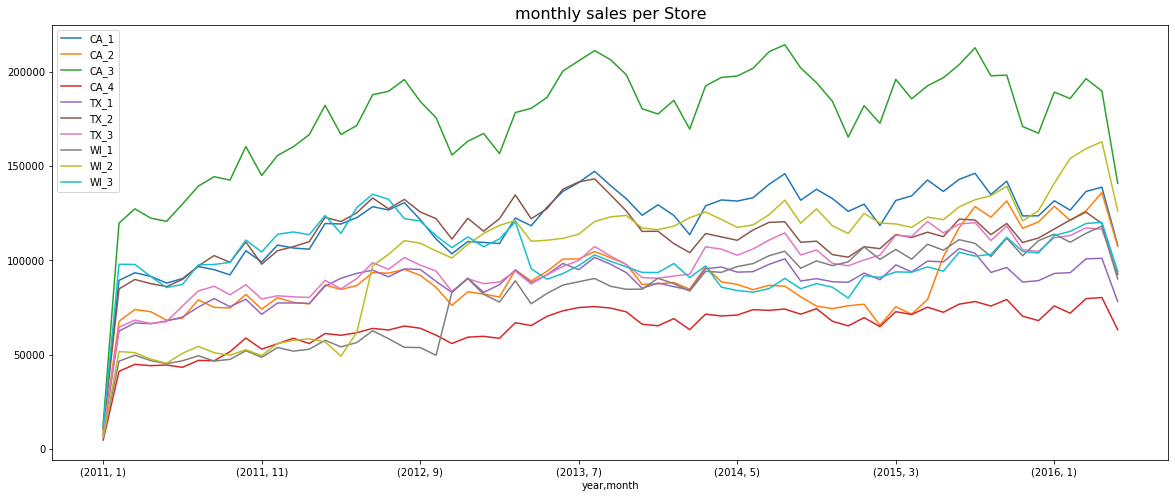

In [19]:
cal.groupby(['year','month']).sum()[store_list].plot(figsize=(20,8))
plt.title('monthly sales per Store',fontsize=16)

Text(0.5, 1.0, 'monthly sales per DEPARTMENT')

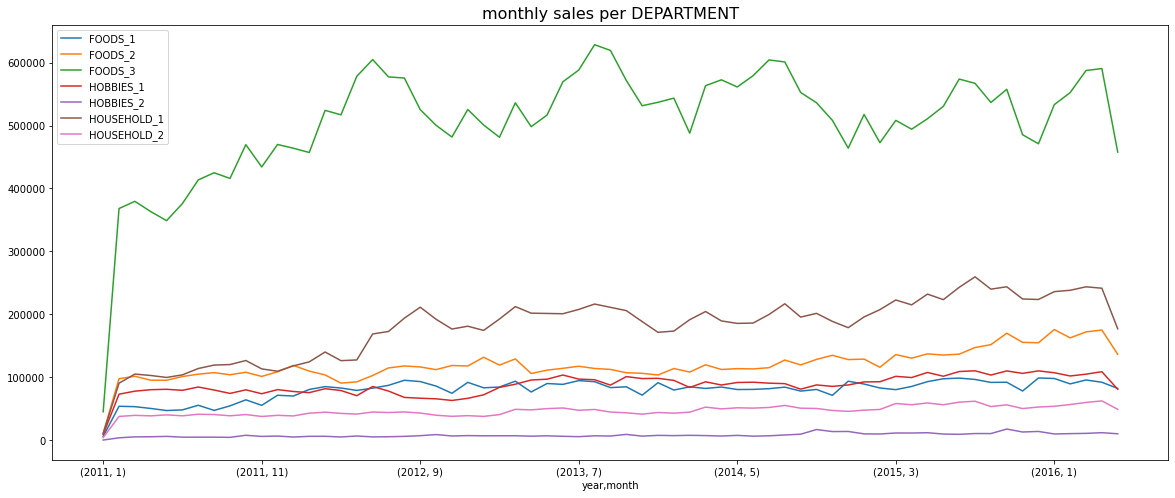

In [20]:
cal.groupby(['year','month']).sum()[dept_list].plot(figsize=(20,8))
plt.title('monthly sales per DEPARTMENT',fontsize=16)

Text(0.5, 1.0, 'Number of items sold on average each day of the week')

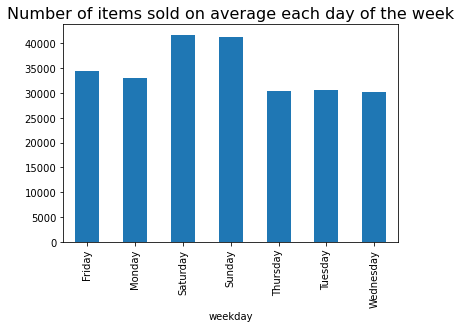

In [21]:
cal.groupby('weekday').mean()['total_sales'].plot(kind='bar')
plt.title('Number of items sold on average each day of the week',fontsize=16)

# EVENT analysis

In [22]:
#days with two events
cal[(cal["event_name_1"].isnull()==False) & (cal["event_name_2"].isnull()==False)]

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,...,HOBBIES,HOUSEHOLD,FOODS_1,FOODS_2,FOODS_3,HOBBIES_1,HOBBIES_2,HOUSEHOLD_1,HOUSEHOLD_2,total_sales
85,2011-04-24,11113,Sunday,2,4,2011,d_86,OrthodoxEaster,Religious,Easter,...,2446,4702,2225,2635,12010,2257,189,3275,1427,24018
827,2013-05-05,11315,Sunday,2,5,2013,d_828,OrthodoxEaster,Religious,Cinco De Mayo,...,3751,9783,3130,5464,21075,3540,211,7736,2047,43203
1177,2014-04-20,11412,Sunday,2,4,2014,d_1178,Easter,Cultural,OrthodoxEaster,...,2990,7634,3205,3070,22035,2779,211,5904,1730,38934
1233,2014-06-15,11420,Sunday,2,6,2014,d_1234,NBAFinalsEnd,Sporting,Father's day,...,3276,8107,3127,4451,23533,3073,203,6300,1807,42494


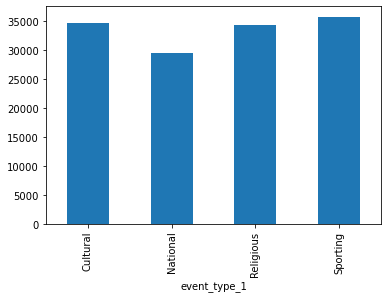

In [23]:
cal.groupby('event_type_1').mean()['total_sales'].plot(kind='bar')

In [24]:
#For every event add in the previous day the event's eve

event_names=cal['event_name_1'].unique().tolist()[1:]

for i in range(cal.shape[0]):
    if cal["event_name_1"][i] in event_names:
        if cal["event_name_1"][i-1] not in event_names:
            if cal["event_name_2"][i-1] not in event_names:
                cal['event_name_2'][i-1]= cal["event_name_1"][i] + " Eve"
                cal['event_type_2'][i-1]= cal['event_type_1'][i]

<ipython-input-24-97ad8d99652f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cal['event_name_2'][i-1]= cal["event_name_1"][i] + " Eve"
<ipython-input-24-97ad8d99652f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cal['event_type_2'][i-1]= cal['event_type_1'][i]


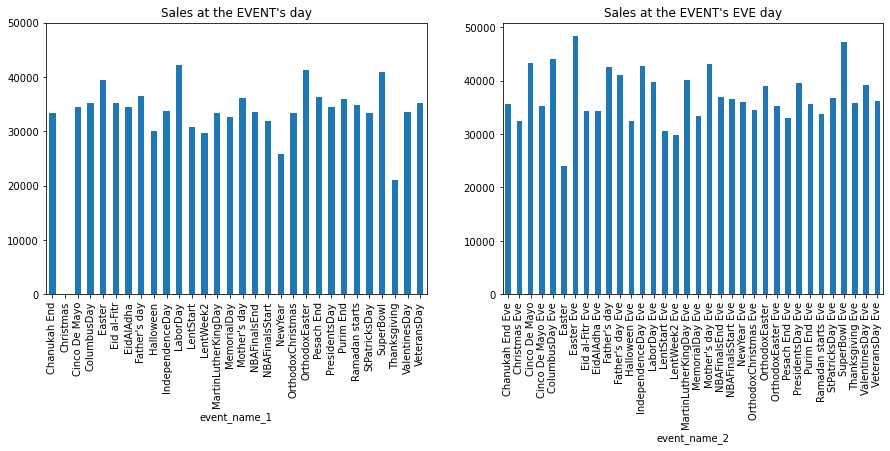

In [25]:
fig,ax=plt.subplots(1,2,figsize=(15,5))


cal.groupby('event_name_1').mean()['total_sales'].plot(kind='bar',ax=ax[0])
ax[0].set_ylim(0,50000)
ax[0].set_title("Sales at the EVENT's day")


cal.groupby('event_name_2').mean()['total_sales'].plot(kind='bar',ax=ax[1])
ax[1].set_title("Sales at the EVENT's EVE day")
plt.show()

Text(0.5, 1.0, 'Average Number of Sales')

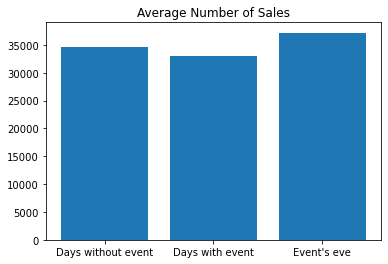

In [26]:
no_event=cal[cal['event_name_1'].isnull()]['total_sales'].mean()
event_day=cal[(cal['event_name_1'].isnull()==False) & (cal['event_name_2'].isnull()==True)]['total_sales'].mean()
event_eve=cal[(cal['event_name_1'].isnull()==True) & (cal['event_name_2'].isnull()==False)]['total_sales'].mean()

plt.bar(["Days without event","Days with event","Event's eve"],[no_event,event_day,event_eve])
plt.title("Average Number of Sales")

Text(0.5, 1.0, "Every year (5/5) on the eve of SuperBowl, Easter and mother's \nday (and probably Columbus day) more than 40k sales \n are made.")

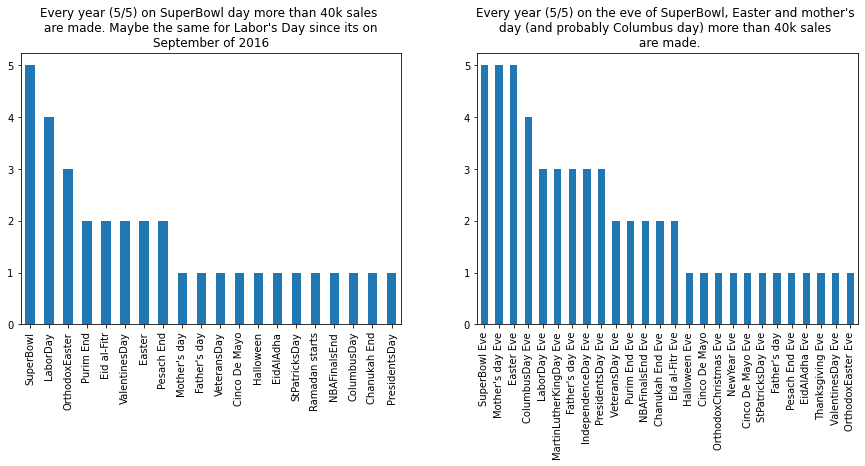

In [27]:
fig,ax=plt.subplots(1,2,figsize=(15,5))

cal[cal['total_sales']>40000]['event_name_1'].value_counts().plot(kind='bar',ax=ax[0])
ax[0].set_title("Every year (5/5) on SuperBowl day more than 40k sales \n are made. Maybe the same for Labor's Day since its on \nSeptember of 2016")

cal[cal['total_sales']>40000]['event_name_2'].value_counts().plot(kind='bar',ax=ax[1])
ax[1].set_title("Every year (5/5) on the eve of SuperBowl, Easter and mother's \nday (and probably Columbus day) more than 40k sales \n are made.")

# So maybe we also care about Christmas, SuperBowl, Easter, Mother's LaborDay and  Columbus day

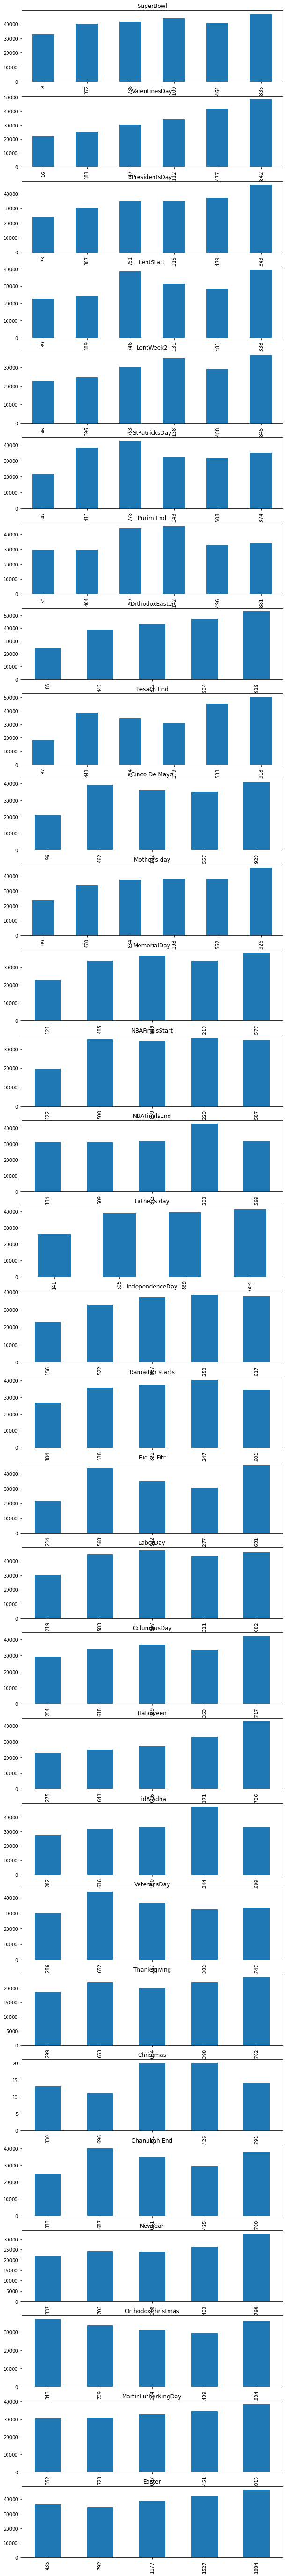

In [29]:
#searching for clearly predictive features
fig,ax=plt.subplots(30,1,figsize=(10,100))

for i,k in enumerate(event_names):
    cal[cal['event_name_1']==k]['total_sales'].plot(kind='bar',ax=ax[i])
    ax[i].set_title(f"{k}")


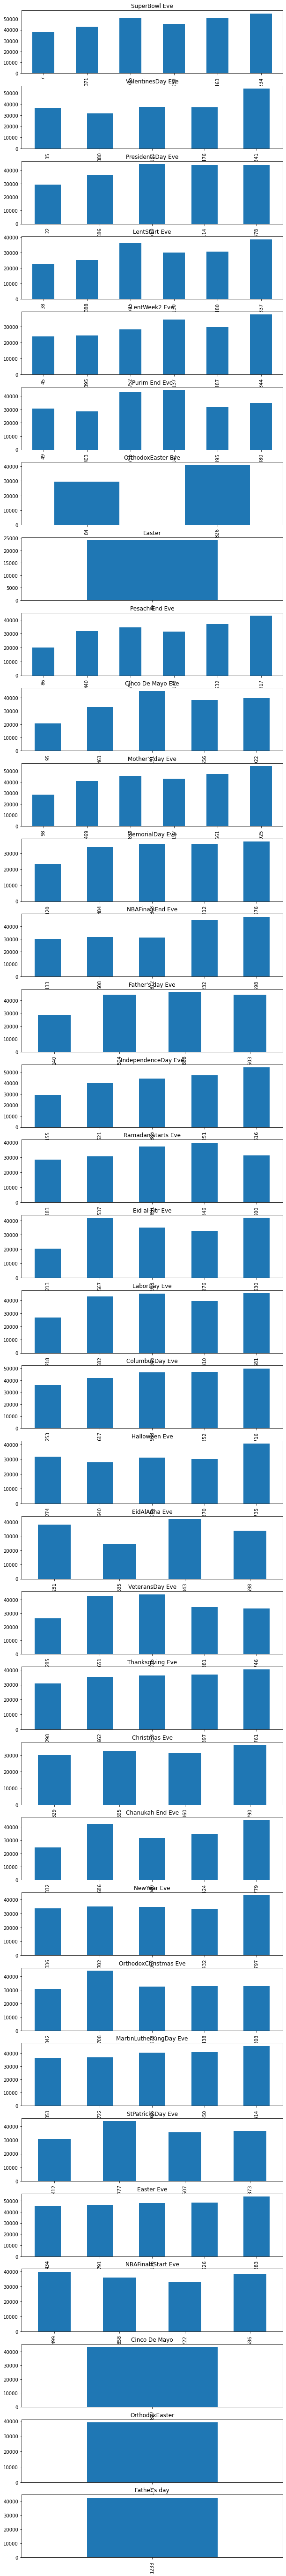

In [30]:
event_eve_names=cal['event_name_2'].unique()[1:].tolist()

fig,ax=plt.subplots(len(event_eve_names),1,figsize=(10,100))

for i,k in enumerate(event_eve_names):
    cal[cal['event_name_2']==k]['total_sales'].plot(kind='bar',ax=ax[i])
    ax[i].set_title(f"{k}")


Text(0.5, 1.0, 'Breakdown of sales per item category for each event')

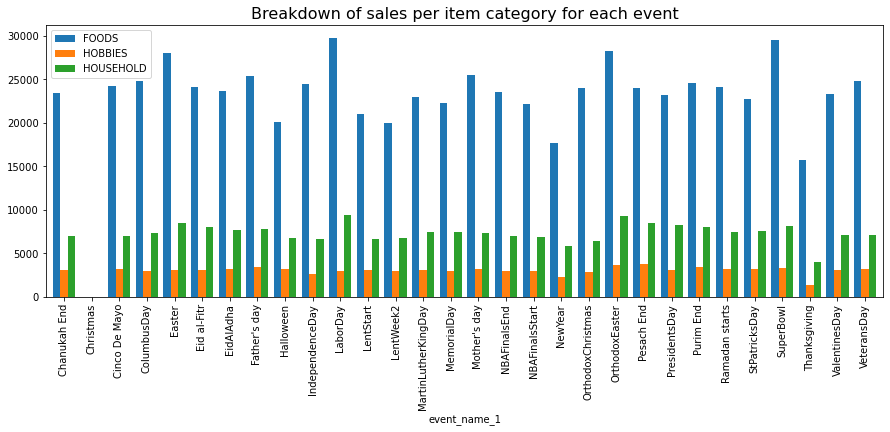

In [31]:
cal.groupby('event_name_1').mean()[['FOODS','HOBBIES','HOUSEHOLD']].plot(kind='bar',width=0.8,figsize=(15,5))
plt.title("Breakdown of sales per item category for each event",fontsize=16)

Text(0.5, 1.0, 'Breakdown of sales per item category for each type of event')

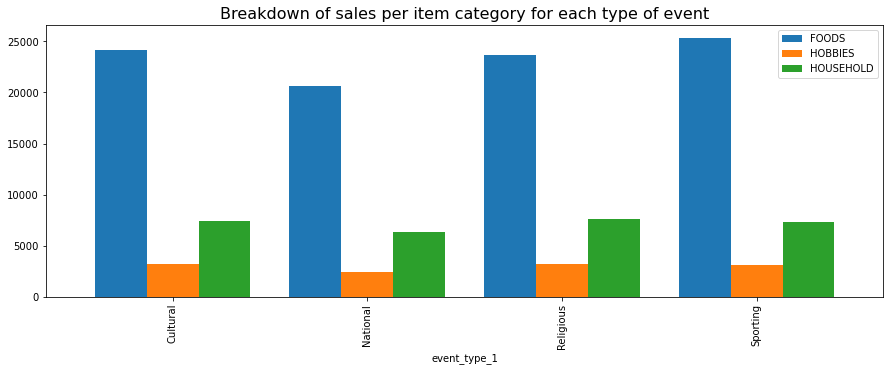

In [32]:
cal.groupby('event_type_1').mean()[['FOODS','HOBBIES','HOUSEHOLD']].plot(kind='bar',width=0.8,figsize=(15,5))
plt.title("Breakdown of sales per item category for each type of event",fontsize=16)